In [5]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv", date_parser="Date")

In [6]:
data.head(1)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0


In [8]:
data.shape
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [11]:
data.columns
data.Country.nunique()

188

In [10]:
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [19]:
data.columns

Index(['Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [20]:
data.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [21]:
data.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [23]:
import numpy as np
for col in data.columns:
    if data[col].skew()>.55:
        data[col]=np.log1p(data[col])

In [24]:
data.skew()

Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

In [25]:
import numpy as np
for col in data.columns:
    if data[col].skew()>.55:
        data[col]=np.log1p(data[col])

In [26]:
data.skew()

Confirmed    0.538470
Recovered    0.344030
Deaths       0.754847
dtype: float64

In [27]:
import numpy as np
for col in data.columns:
    if data[col].skew()>.55:
        data[col]=np.log1p(data[col])

In [28]:
data.skew()

Confirmed    0.538470
Recovered    0.344030
Deaths       0.512083
dtype: float64

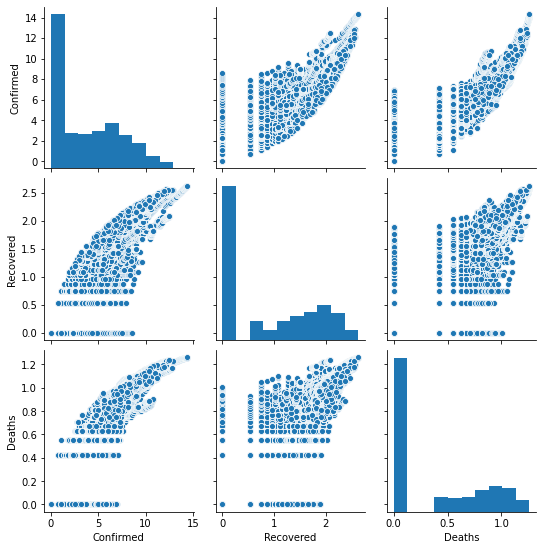

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

<AxesSubplot:>

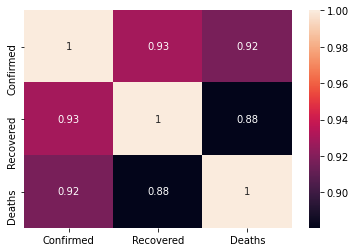

In [30]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

<AxesSubplot:>

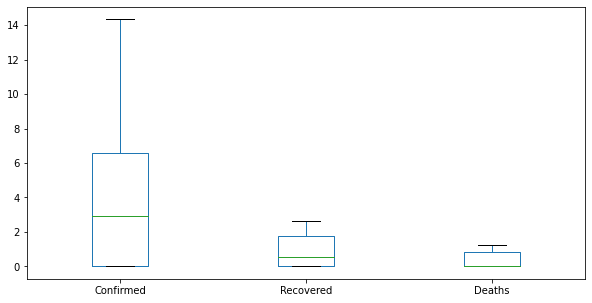

In [37]:
data.boxplot(
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(10,5))

In [38]:
from scipy.stats import zscore
zs=abs(zscore(data))

In [40]:
data1=data[(zs<3).all(axis=1)]

In [41]:
data.shape, data1.shape

((23688, 3), (23688, 3))

In [43]:
df_x=data.drop(columns=["Deaths"])
y=data.Deaths

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x_=sc.fit_transform(df_x)

In [46]:
X=pd.DataFrame(df_x_, columns=df_x.columns)

In [47]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X,y,test_size=.2, random_state=123)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

0.17495309103573567

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring="r2").mean()

0.5202008170191008

In [59]:
from sklearn.externals import joblib
joblib.dump(lr, "COVID.pkl")

['COVID.pkl']